In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import warnings
import lec7_graphs as gfx
warnings.filterwarnings(action="ignore")
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = (10,6)

In [6]:
import factor_analyzer
import missingno as msgn

In [7]:
df = pd.read_csv('cep45.csv')

In [8]:
df.head()

,corr,filtro,psu,region,p1_1,p1_2,p1_3,p2,p3,p4,...,de14_b,de14_c,de14_d,de14_e,de14_f,de15,de16,de17,b5,pond
0,1,937,150,13,9,3,6,1,3,2,...,2,2,2,2,2,6,4,4,1,0.782461
1,2,938,150,13,7,6,3,2,2,1,...,2,2,1,2,2,8,4,4,1,1.157864
2,3,939,150,13,3,6,9,2,2,3,...,2,2,2,2,2,9,6,4,1,1.204037
3,4,1096,182,13,3,4,11,3,2,2,...,2,2,2,2,2,6,3,3,1,1.025330
4,5,1097,182,13,6,11,7,3,1,1,...,2,2,2,2,2,6,3,3,1,1.204037


In [9]:
trust_df = df.filter(regex='p17_*')

In [14]:
trust_df = trust_df.rename(columns={
    'p17_a': 'I. catolica',
    'p17_b': 'I evangelica',
    'p17_c': 'FFAA',
    'p17_d': 'Justicia',
    'p17_e': 'Prensa',
    'p17_f': 'television',
    'p17_g': 'Sindicatos',
    'p17_h': 'Carabineros',
    'p17_i': 'Gobierno',
    'p17_j': 'Partidos Politicos',
    'p17_k': 'Congreso',
    'p17_i': 'Empresas',
    'p17_m': 'Universidades',
    'p17_n': 'Radio'
})

In [15]:
def fetch_missing(df, missing_vals=[8,9]):
    for colname, serie in df.iteritems():
        print(colname, serie.isin(missing_vals).value_counts('%')[1].round(2))

In [16]:
fetch_missing(trust_df)

I. catolica 0.03
I evangelica 0.07
FFAA 0.04
Justicia 0.04
Prensa 0.03
television 0.02
Sindicatos 0.09
Carabineros 0.02
Empresas 0.03
Partidos Politicos 0.03
Congreso 0.05
p17_l 0.04
Universidades 0.07
Radio 0.03


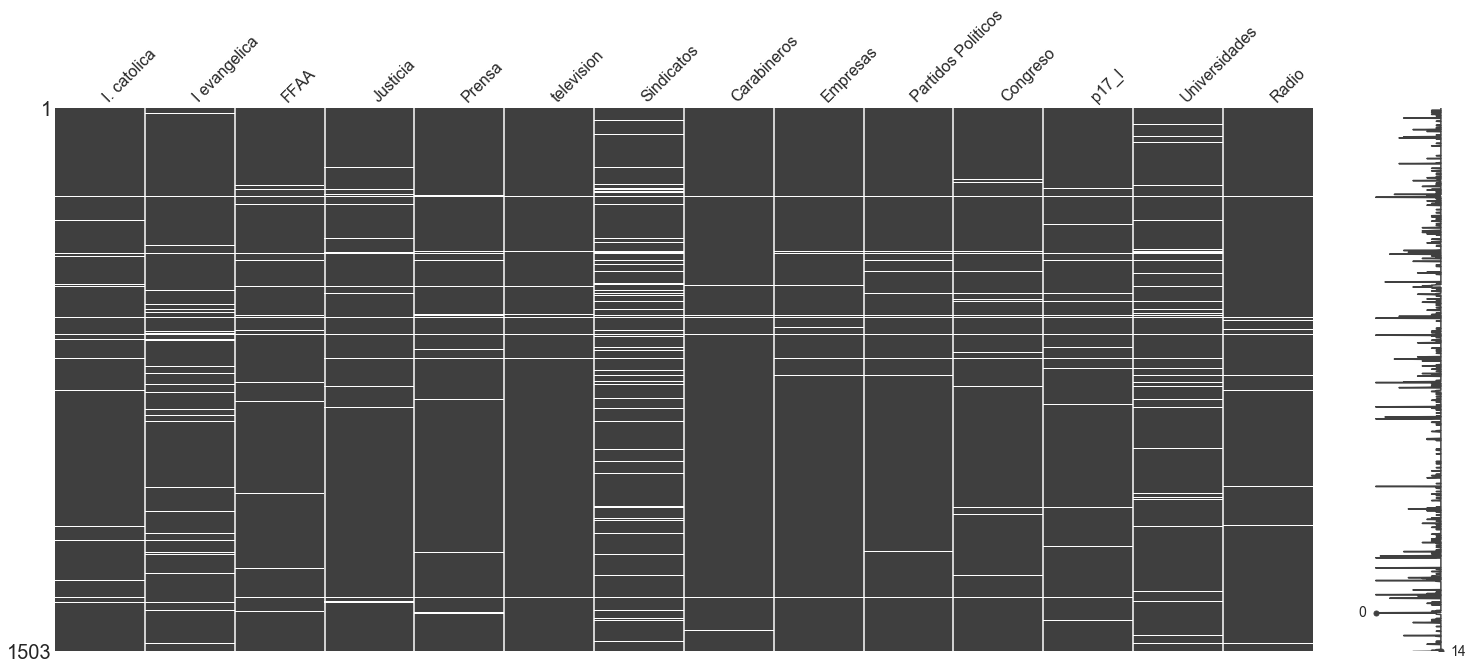

In [18]:
msgn.matrix(trust_df.replace([8,9],[np.nan,np.nan]))

In [19]:
variable, mean = [] , []
for colname, serie in trust_df.iteritems():
    variable.append(colname)
    mean.append(serie.mean())

tmp_df = pd.DataFrame({'var':variable,'mean':mean}).sort_values(by=['mean'])


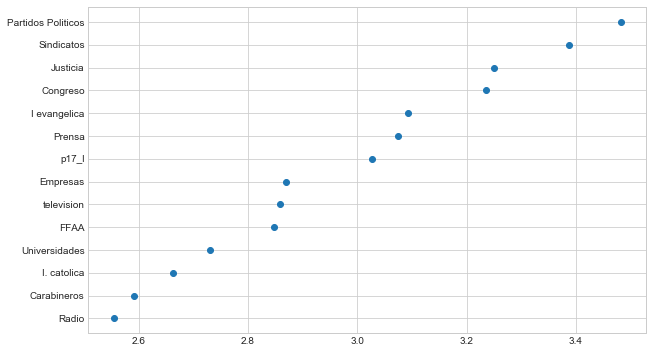

In [20]:
plt.plot(tmp_df['mean'], tmp_df['var'],'o')

In [21]:
import factor_analyzer as factor
factor.calculate_bartlett_sphericity(trust_df)

(6644.835705911947, 0.0)

In [30]:
factor.calculate_kmo(trust_df)

(array([0.93853431, 0.92717654, 0.93176781, 0.95285454, 0.91971575,
        0.88552639, 0.93671982, 0.91120486, 0.93981619, 0.91291311,
        0.91928052, 0.94234885, 0.95178434, 0.93221226]), 0.9274657194111268)

In [52]:
factorize = factor.FactorAnalyzer(n_factors=2,rotation='varimax')
factorize.fit(trust_df)

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
        method='minres', n_factors=2, rotation='varimax',
        rotation_kwargs={}, use_smc=True)

In [53]:
factor_eigenvalues = factorize.get_eigenvalues()
factor_eigenvalues

(array([5.49842419, 1.14587292, 0.89926341, 0.85550809, 0.72165128,
        0.69572011, 0.63389523, 0.62396403, 0.60609083, 0.57058745,
        0.49919319, 0.46208615, 0.40448333, 0.38325979]),
 array([ 4.91723549,  0.57782653,  0.26323977,  0.11024165,  0.10652883,
         0.05801108,  0.04622042, -0.01423452, -0.01860054, -0.06205142,
        -0.0803772 , -0.09821925, -0.13627482, -0.17448364]))

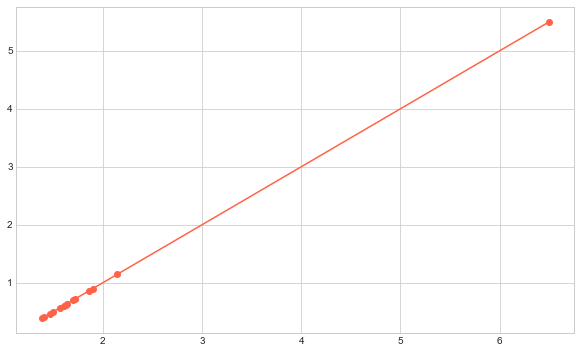

In [55]:
plt.plot(factor_eigenvalues[0]+1,factor_eigenvalues[0],'o-',color='tomato')

In [60]:
factorize.loadings_(lambda x: np.where(x < .4, ' ',round(x,2)))

TypeError: 'numpy.ndarray' object is not callable

In [61]:
fact_load = factorize.loadings_

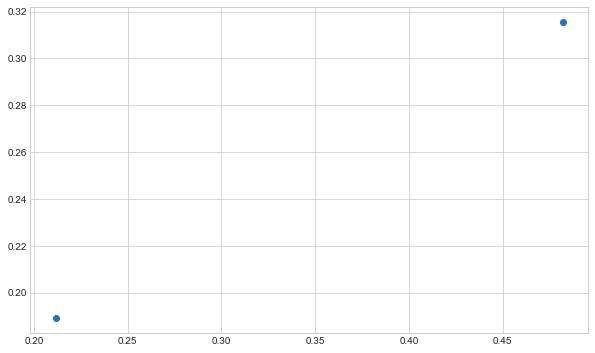

In [69]:
plt.plot(fact_load[0],fact_load[1],'o')

In [63]:
factor_var = factorize.get_factor_variance()
factor_var

(array([2.8546665 , 2.64039588]),
 array([0.20390475, 0.18859971]),
 array([0.20390475, 0.39250446]))

In [64]:
extract_factor_scores = factorize.transform(trust_df)

In [67]:
extract_factor_scores

array([[-0.67809168,  0.33784116],
       [-0.0480973 , -0.00985878],
       [ 0.54219961,  0.42465027],
       ...,
       [-0.22806842,  0.13539122],
       [-0.03749915, -0.04883833],
       [ 4.13069654, -0.00732222]])

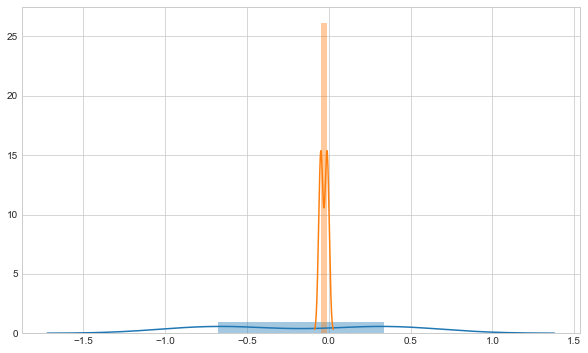

In [72]:
sns.distplot(extract_factor_scores[0], label='Institucionalistas')
sns.distplot(extract_factor_scores[1], label='Cotidianos')

In [74]:
from sklearn.datasets import load_digits
df = load_digits()

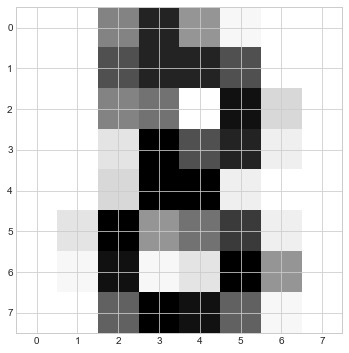

In [78]:
plt.imshow(df.data[8].reshape([8,8]))

In [79]:
from sklearn.decomposition import PCA

In [80]:
dimred = PCA(n_components=2)

In [81]:
project_x = dimred.fit_transform(df.data)

In [82]:
df.data.shape

(1797, 64)

In [83]:
project_x.shape

(1797, 2)

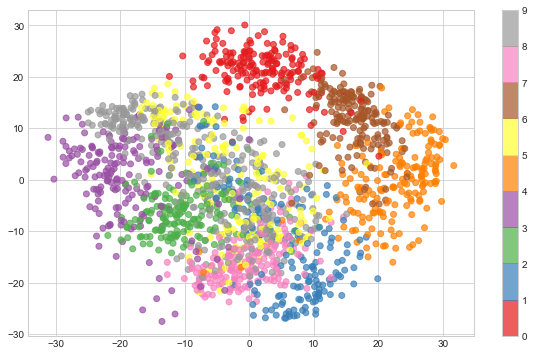

In [88]:
plt.scatter(project_x[:,0], project_x[:,1], c=df.target, alpha=.7, cmap='Set1')
plt.colorbar()

In [90]:
dimred.explained_variance_ratio_ #explica un 15% las variables en x y un 14% en y

array([0.14890594, 0.13618771])

In [91]:
fetch_dim = PCA().fit(df.data)
n_dims = len(fetch_dim.components_)

In [92]:
n_dims

64

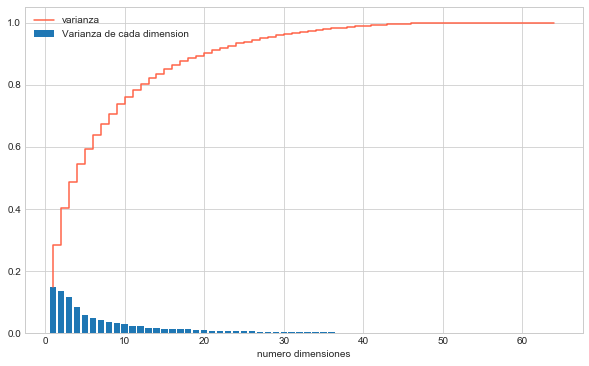

In [97]:
plt.bar(range(1,n_dims +1), fetch_dim.explained_variance_ratio_ , label='Varianza de cada dimension')
plt.step(range(1,n_dims +1), np.cumsum(fetch_dim.explained_variance_ratio_), color='tomato', label='varianza')
plt.xlabel('numero dimensiones')
plt.legend()

In [101]:
pca = PCA(n_components=10)
project_x = pca.fit_transform(df.data)
np.cumsum(pca.explained_variance_ratio_)

array([0.14890594, 0.28509365, 0.40303959, 0.48713938, 0.54496353,
       0.59413262, 0.63729243, 0.67390607, 0.70743835, 0.73822575])

In [102]:
df.data[6]

array([ 0.,  0.,  0., 12., 13.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  8.,
        0.,  0.,  0.,  0.,  0., 13., 16.,  3.,  0.,  0.,  0.,  0.,  0.,
       14., 13.,  0.,  0.,  0.,  0.,  0.,  0., 15., 12.,  7.,  2.,  0.,
        0.,  0.,  0., 13., 16., 13., 16.,  3.,  0.,  0.,  0.,  7., 16.,
       11., 15.,  8.,  0.,  0.,  0.,  1.,  9., 15., 11.,  3.,  0.])

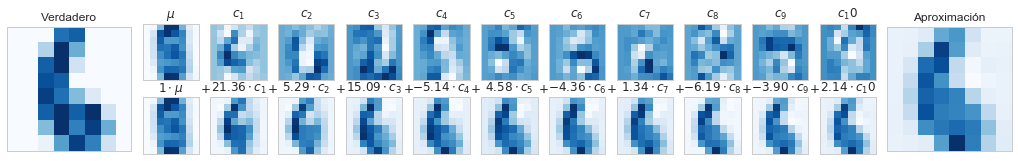

In [106]:
gfx.plot_pca_components(df.data[6],project_x[6], pca.mean_ , pca.components_);